# Data Science Regression Project : Bengaluru House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

Loading Bengaluru House Price Dataset into Dataframe

In [2]:
df=pd.read_csv('../input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

# Short Analysis

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns.values

array(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'], dtype=object)

In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# Data Wrangling

Converting Price(in lakhs) to normal form

In [8]:
df['price']=df['price']*100000
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,5100000.0


Finding unique values and count for each parameter

In [9]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    #print('\n')
    print('__________________________________________________________________________________________\n')

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
__________________________________________________________________________________________

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
17-Jan               1
15-Dec               1
16-Jul               1
14-Nov               1
16-Oct               1
Name: availability, Length: 81, dtype: int64
__________________________________________________________________________________________

location
Whitefield              540
Sarjapur  Road          399
Electronic City         302
Kanakpura Road          273
Thanisandra             234
                       ... 
Double Road               1
Maruthi Extension         1
High grounds              1
CHIKKATIRUPATHI           1
 Sector 1 HSR Layout      1
Name: location, Length: 1305, dt

Size Data Featuring

In [10]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
13 BHK           1
16 BHK           1
12 Bedroom       1
14 BHK           1
43 Bedroom       1
19 BHK           1
27 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [11]:
df['size'].describe()

count     13304
unique       31
top       2 BHK
freq       5199
Name: size, dtype: object

In [12]:
#Replacing size null Values with 0
df['size'].fillna('0',inplace=True)
df[df['size']=='0']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,0,Asiss B,1200 - 2400,NaN,NaN,3418500.0
1775,Plot Area,Immediate Possession,IVC Road,0,Orana N,2000 - 5634,NaN,NaN,12400000.0
2264,Plot Area,Immediate Possession,Banashankari,0,NaN,2400,NaN,NaN,46000000.0
2809,Plot Area,Immediate Possession,Sarjapur Road,0,AsdiaAr,1200 - 2400,NaN,NaN,2878500.0
2862,Plot Area,Immediate Possession,Devanahalli,0,Ajleyor,1500 - 2400,NaN,NaN,4680000.0
5333,Plot Area,Immediate Possession,Devanahalli,0,Emngs S,2100 - 5405,NaN,NaN,17711500.0
6423,Plot Area,Immediate Possession,Whitefield,0,SRniaGa,2324,NaN,NaN,2673000.0
6636,Plot Area,Immediate Possession,Jigani,0,S2enste,1500,NaN,NaN,2549000.0
6719,Plot Area,Immediate Possession,Hoskote,0,SJowsn,800 - 2660,NaN,NaN,2854500.0
7680,Plot Area,Immediate Possession,Kasavanhalli,0,NaN,5000,NaN,NaN,40000000.0


In [13]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '0', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Removing sufix such as 'BHK', 'Bedroom', 'RK',etc from size values

In [14]:
df['size'] = df['size'].apply(lambda x : int(x.split()[0]))
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,5100000.0


Bath and Balcony Data Featuring

In [15]:
df.bath.describe()

count    13247.000000
mean         2.692610
std          1.341458
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [16]:
df[df['bath'].isnull()].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,20-Feb,Devanahalli,4,BrereAt,3010 - 3410,NaN,NaN,19200000.0
81,Built-up Area,18-Oct,Hennur Road,4,Gollela,2957 - 3450,NaN,NaN,22450000.0
224,Super built-up Area,19-Dec,Devanahalli,3,Jurdsig,1520 - 1740,NaN,NaN,7482000.0
344,Super built-up Area,21-Dec,Kanakpura Road,1,PrarePa,525,NaN,NaN,2153000.0
579,Plot Area,Immediate Possession,Sarjapur Road,0,Asiss B,1200 - 2400,NaN,NaN,3418500.0


In [17]:
df.balcony.describe()

count    12711.000000
mean         1.584376
std          0.817263
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

In [18]:
df[df['balcony'].isnull()].head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6,Super built-up Area,18-May,Old Airport Road,4,Jaades,2732,4.0,NaN,20400000.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,Brway G,3300,4.0,NaN,60000000.0
9,Plot Area,Ready To Move,Gandhi Bazar,6,NaN,1020,6.0,NaN,37000000.0
34,Built-up Area,Ready To Move,Kasturi Nagar,3,Kantsce,1925,3.0,NaN,12500000.0
40,Built-up Area,Ready To Move,Murugeshpalya,2,Gentson,1296,2.0,NaN,8100000.0


Filling Null Values of bath and balcony 

In [19]:
for bedr in df['size']:
    if bedr==0:
        df['bath']=df['bath'].fillna(0)
        df['balcony']=df['balcony'].fillna(0)
    elif bedr >=5:
        df['bath']=df['bath'].fillna(3)
        df['balcony']=df['balcony'].fillna(3)
    else:
        df['bath']=df['bath'].fillna(int(df['bath'].mean()))
        df['balcony']=df['balcony'].fillna(int(df['balcony'].mean()))

In [20]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,5100000.0


total_sqft data Featuring

Finding total_sqft values which are in string format

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4,LedorSa,2100 - 2850,4.0,0.0,18600000.0
56,Built-up Area,20-Feb,Devanahalli,4,BrereAt,3010 - 3410,2.0,1.0,19200000.0
81,Built-up Area,18-Oct,Hennur Road,4,Gollela,2957 - 3450,2.0,1.0,22450000.0
122,Super built-up Area,18-Mar,Hebbal,4,SNontle,3067 - 8156,4.0,0.0,47700000.0
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2,Vaarech,1042 - 1105,2.0,0.0,5400500.0
165,Super built-up Area,18-Dec,Sarjapur,2,Kinuerg,1145 - 1340,2.0,0.0,4349000.0
188,Super built-up Area,Ready To Move,KR Puram,2,MCvarar,1015 - 1540,2.0,0.0,5680000.0
224,Super built-up Area,19-Dec,Devanahalli,3,Jurdsig,1520 - 1740,2.0,1.0,7482000.0
410,Super built-up Area,Ready To Move,Kengeri,1,NaN,34.46Sq. Meter,1.0,0.0,1850000.0
549,Super built-up Area,18-Sep,Hennur Road,2,Shxorm,1195 - 1440,2.0,0.0,6377000.0


Above total_sqft data shows values are in form of range or in different units  
Converting values which are in range by simply taking mean of min snd max of range.  
eg. for 2100-2850 the mean will be (2100+2850)/2=2475  
And for values with different units, converting them to square foot by unit conversion.

In [22]:
def total_sqft_modification(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [23]:
df['total_sqft'] = df.total_sqft.str.split('-').apply(total_sqft_modification)

In [24]:
df.total_sqft.describe()

count    1.332000e+04
mean     1.911599e+03
std      1.727697e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.277250e+03
75%      1.680000e+03
max      1.306800e+06
Name: total_sqft, dtype: float64

In [25]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,5100000.0


Availability Data Featuring

Converting availability values with month year to only year  
eg. 19-Dec to 2019

In [26]:
df['availability']=df['availability'].apply(lambda x : str(x.split('-')[0]))

In [27]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,5100000.0


In [28]:
for i in df['availability'].unique():
    if i!='Immediate Possession':
        if i!='Ready To Move':
            a='20'+i
            int(a)
            df['availability']=df['availability'].replace(i,a)

In [29]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2019,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,5100000.0


In [30]:
df.availability.value_counts()

Ready To Move           10581
2018                     1678
2019                      477
2020                      183
2021                      182
2017                      130
2022                       51
Immediate Possession       16
2016                       13
2015                        7
2014                        2
Name: availability, dtype: int64

In [31]:
df[df['location'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3,Grare S,1600.0,3.0,2.0,8600000.0


In [32]:
#Filling null values of location by Others
df['location'].fillna('Others',inplace=True)

Removing Society from Dataframe as most of the data is missing

In [33]:
df.drop('society',axis=1,inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,2019,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,12000000.0
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,6200000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,5100000.0


Adding New Feature of Price per Square Feet

In [34]:
df['price_per_sqft']=df['price']/df['total_sqft']
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,2019,Electronic City Phase II,2,1056.0,2.0,1.0,3907000.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5.0,3.0,12000000.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2.0,3.0,6200000.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3.0,1.0,9500000.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2.0,1.0,5100000.0,4250.000000


Removing Apartments having total_sqft less than 300

In [35]:
df[df['total_sqft']<300]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
119,Plot Area,Ready To Move,Hennur Road,2,276.0000,3.0,3.0,2300000.0,8.333333e+03
349,Plot Area,2018,Suragajakkanahalli,3,11.0000,3.0,2.0,7400000.0,6.727273e+05
1020,Carpet Area,Ready To Move,Weavers Colony,1,15.0000,1.0,0.0,3000000.0,2.000000e+05
1122,Built-up Area,Ready To Move,Grihalakshmi Layout,5,24.0000,2.0,2.0,15000000.0,6.250000e+05
2486,Super built-up Area,2019,Bhoganhalli,1,296.0000,1.0,0.0,2289000.0,7.733108e+03
4086,Plot Area,Ready To Move,Sarjapur Road,4,1.0000,4.0,1.0,12000000.0,1.200000e+07
4972,Built-up Area,Ready To Move,Srirampuram,7,5.0000,7.0,3.0,11500000.0,2.300000e+06
5970,Plot Area,Ready To Move,Mysore Road,1,45.0000,1.0,0.0,2300000.0,5.111111e+04
10526,Super built-up Area,Ready To Move,Yelahanka New Town,1,284.0000,1.0,1.0,800000.0,2.816901e+03
11558,Plot Area,2019,Whitefield,4,60.0000,4.0,2.0,21800000.0,3.633333e+05


In [36]:
df.drop(df[df['total_sqft']<300].index,inplace=True)

Removing Apartments having price per sqft rate higher than 40000

In [37]:
df[df['price_per_sqft']>=40000].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
1567,Plot Area,Ready To Move,Uttarahalli,5,400.0,5.0,1.0,20000000.0,50000.000000
5042,Plot Area,2018,2nd Block Jayanagar,6,825.0,6.0,1.0,40000000.0,48484.848485
5365,Built-up Area,Ready To Move,Banashankari Stage II,4,1500.0,2.0,0.0,65000000.0,43333.333333
5668,Built-up Area,Ready To Move,Judicial Layout,5,405.0,6.0,3.0,40000000.0,98765.432099
6421,Plot Area,2018,Bommenahalli,4,2940.0,3.0,2.0,225000000.0,76530.612245


In [38]:
df.drop(df[df['price_per_sqft']>=40000].index,inplace=True)

Removing Apartments having price per square foot rate less than 1500

In [39]:
df[df.price_per_sqft<=1500].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
648,Built-up Area,Ready To Move,Arekere,9,1123031.25,9.0,1.0,26500000.0,23.596850
674,Built-up Area,Ready To Move,Yelahanka,3,35000.00,3.0,3.0,13000000.0,371.428571
775,Built-up Area,Ready To Move,Basavanagara,1,10763.90,2.0,1.0,9300000.0,863.999108
810,Plot Area,2018,4 Bedroom Farm House in Bagalur,4,10961.00,4.0,1.0,8000000.0,729.860414
872,Super built-up Area,Ready To Move,Singapura Village,2,9900.00,2.0,1.0,4500000.0,454.545455


In [40]:
df.drop(df[df['price_per_sqft']<=1500].index,inplace=True)

Removing Apartments according to size and total square foot  
eg. Its generally not possible for 1 bhk Apartments to have 10763.9 sqft area so excluding such types

In [41]:
df.shape

(13253, 9)

In [42]:
df[(df['size']==1) & (df['total_sqft']/df['size']>=1800)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
3539,Built-up Area,Ready To Move,Kundalahalli,1,2400.0,1.0,0.0,65000000.0,27083.333333
5137,Super built-up Area,Ready To Move,Banashankari,1,2400.0,1.0,1.0,20000000.0,8333.333333
6549,Plot Area,Ready To Move,Shivaji Nagar,1,3820.0,1.0,1.0,30600000.0,8010.471204
7824,Super built-up Area,Ready To Move,Sector 1 HSR Layout,1,6000.0,1.0,1.0,27600000.0,4600.000000
9047,Built-up Area,Ready To Move,Vijayanagar,1,2400.0,2.0,0.0,23000000.0,9583.333333
9078,Plot Area,Ready To Move,Gottigere,1,1806.0,1.0,1.0,15000000.0,8305.647841
9423,Plot Area,Ready To Move,Ramamurthy Nagar,1,2400.0,1.0,1.0,4800000.0,2000.000000
9845,Plot Area,Ready To Move,Akshaya Nagar,1,2000.0,1.0,0.0,20000000.0,10000.000000
12574,Super built-up Area,Ready To Move,Sadhguru Layout,1,2559.0,1.0,1.0,5500000.0,2149.277061
13245,Super built-up Area,Ready To Move,12th cross srinivas nagar banshankari 3rd stage,1,1800.0,1.0,1.0,20000000.0,11111.111111


In [43]:
df.drop(df[(df['size']==1) & (df['total_sqft']/df['size']>=1800)].index,inplace=True)

In [44]:
df[(df['size']>1) & (df['size']<4) & (df['total_sqft']/df['size']>=3000)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
4799,Plot Area,Ready To Move,Bannerghatta Road,3,9000.0,4.0,1.0,39000000.0,4333.333333
11856,Super built-up Area,Ready To Move,Kalyan nagar,2,8840.0,2.0,3.0,30000000.0,3393.665158
12570,Super built-up Area,Ready To Move,Bommasandra Industrial Area,2,7000.0,2.0,1.0,13500000.0,1928.571429


In [45]:
df.drop(df[(df['size']>1) & (df['size']<4) & (df['total_sqft']/df['size']>=3000)].index,inplace=True)

In [46]:
df[(df['size']>3) & (df['total_sqft']/df['size']>=4000)]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
2623,Plot Area,2018,Dodsworth Layout,4,30000.0,4.0,1.0,210000000.0,7000.000000
6552,Plot Area,Ready To Move,5 Bedroom Farm House in Lakshmipura,5,26136.0,6.0,2.0,55000000.0,2104.377104
12987,Plot Area,Ready To Move,Dodsworth Layout,6,30400.0,4.0,2.0,182400000.0,6000.000000


In [47]:
df.drop(df[(df['size']>3) & (df['total_sqft']/df['size']>=4000)].index,inplace=True)

In [48]:
df[df['total_sqft']/df['size']<300].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
9,Plot Area,Ready To Move,Gandhi Bazar,6,1020.0,6.0,1.0,37000000.0,36274.509804
45,Plot Area,Ready To Move,HSR Layout,8,600.0,9.0,1.0,20000000.0,33333.333333
58,Plot Area,Ready To Move,Murugeshpalya,6,1407.0,4.0,1.0,15000000.0,10660.980810
68,Plot Area,Ready To Move,Devarachikkanahalli,8,1350.0,7.0,0.0,8500000.0,6296.296296
70,Plot Area,Ready To Move,Double Road,3,500.0,3.0,2.0,10000000.0,20000.000000


In [49]:
df.drop(df[df['total_sqft']/df['size']<300].head().index,inplace=True)

Removing Data having number of bathrooms much greater than size(bhk)  
eg. A 3 bhk or less apartment usually don't have 5 baths(can be max with 1 common and 3 with attached bedroom)  
But in case of apartments with size greater than 4 may have baths equal to size+2

In [50]:
df[df['bath']>=df['size']+2].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
84,Super built-up Area,Ready To Move,EPIP Zone,3,1499.0,5.0,2.0,10200000.0,6804.536358
209,Plot Area,Ready To Move,Padmanabhanagar,4,1736.0,6.0,0.0,19000000.0,10944.700461
337,Super built-up Area,Ready To Move,Thigalarapalya,4,3122.0,6.0,2.0,23000000.0,7367.072389
490,Super built-up Area,Ready To Move,Old Madras Road,5,4500.0,7.0,3.0,33700000.0,7488.888889
524,Super built-up Area,2017,Jakkur,4,5230.0,6.0,1.0,46500000.0,8891.013384


In [51]:
df.drop(df[df['bath']>df['size']+2].index,inplace=True)

In [52]:
df[(df['size']<=5) & (df['bath']>=df['size']+2)].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
84,Super built-up Area,Ready To Move,EPIP Zone,3,1499.0,5.0,2.0,10200000.0,6804.536358
209,Plot Area,Ready To Move,Padmanabhanagar,4,1736.0,6.0,0.0,19000000.0,10944.700461
337,Super built-up Area,Ready To Move,Thigalarapalya,4,3122.0,6.0,2.0,23000000.0,7367.072389
490,Super built-up Area,Ready To Move,Old Madras Road,5,4500.0,7.0,3.0,33700000.0,7488.888889
524,Super built-up Area,2017,Jakkur,4,5230.0,6.0,1.0,46500000.0,8891.013384


In [53]:
df.drop(df[(df['size']<=5) & (df['bath']>=df['size']+2)].index,inplace=True)

The data shown below is invalid because  
1] 18 bhk houses usually dont exist  
2] And if they exist their total_sqft is not as low as shown below

In [54]:
df[df['size']>=17]

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27,8000.0,27.0,0.0,23000000.0,2875.000000
3379,Super built-up Area,Ready To Move,1Hanuman Nagar,19,2000.0,16.0,1.0,49000000.0,24500.000000
4684,Plot Area,Ready To Move,Munnekollal,43,2400.0,40.0,0.0,66000000.0,27500.000000
11559,Plot Area,2018,1Kasavanhalli,18,1200.0,18.0,1.0,20000000.0,16666.666667


In [55]:
df.drop(df[df['size']>=17].index,inplace=True)

Converting Location values having total count less than or equal to 10 to 'Others'  
This also helps while buliding model as there will less columns in dummy

In [56]:
locations=dict(df['location'].value_counts())
locations

{'Whitefield': 532,
 'Sarjapur  Road': 388,
 'Electronic City': 301,
 'Kanakpura Road': 268,
 'Thanisandra': 233,
 'Yelahanka': 206,
 'Uttarahalli': 185,
 'Marathahalli': 175,
 'Raja Rajeshwari Nagar': 171,
 'Hebbal': 166,
 'Hennur Road': 151,
 'Bannerghatta Road': 150,
 '7th Phase JP Nagar': 149,
 'Haralur Road': 142,
 'Electronic City Phase II': 132,
 'Rajaji Nagar': 103,
 'Chandapura': 100,
 'Bellandur': 96,
 'KR Puram': 90,
 'Hoodi': 88,
 'Electronics City Phase 1': 88,
 'Yeshwanthpur': 85,
 'Begur Road': 81,
 'Harlur': 78,
 'Sarjapur': 78,
 'Kasavanhalli': 78,
 'Hormavu': 74,
 'Banashankari': 72,
 'Ramamurthy Nagar': 72,
 'Hosa Road': 72,
 'Kengeri': 71,
 'Varthur': 70,
 'JP Nagar': 70,
 'Koramangala': 69,
 'Jakkur': 68,
 'Kothanur': 66,
 'Kaggadasapura': 63,
 'Nagarbhavi': 63,
 'Akshaya Nagar': 61,
 'TC Palaya': 60,
 'Malleshwaram': 57,
 '8th Phase JP Nagar': 57,
 'Old Madras Road': 56,
 'Rachenahalli': 56,
 'Hennur': 55,
 'Thigalarapalya': 54,
 'Budigere': 54,
 'Jigani': 53,
 'H

In [57]:
for k,v in list(locations.items()):
    if v>10:
        del locations[k]
locations

{'Kalkere': 10,
 'Nagappa Reddy Layout': 10,
 'Thyagaraja Nagar': 10,
 'Basapura': 10,
 'Gunjur Palya': 10,
 'Bommenahalli': 10,
 '1st Block Koramangala': 10,
 'Nagadevanahalli': 10,
 'Naganathapura': 10,
 'Ganga Nagar': 10,
 'Richmond Town': 9,
 '2nd Phase JP Nagar': 9,
 'Vishwanatha Nagenahalli': 9,
 'BTM 1st Stage': 9,
 'Chandra Layout': 9,
 'Vignana Nagar': 9,
 'Mathikere': 9,
 'Peenya': 9,
 'Sadashiva Nagar': 9,
 'Kamakshipalya': 9,
 'Volagerekallahalli': 9,
 'Medahalli': 9,
 'Yemlur': 9,
 'Banagiri Nagar': 9,
 'B Narayanapura': 9,
 'Gollahalli': 9,
 'Kaverappa Layout': 9,
 'KUDLU MAIN ROAD': 9,
 'Lingarajapuram': 9,
 'Ejipura': 9,
 'Chennammana Kere': 9,
 'Huskur': 8,
 'Shanti Nagar': 8,
 'Thirumenahalli': 8,
 '4th Block Koramangala': 8,
 'Vajarahalli': 8,
 'Manayata Tech Park': 8,
 'Dodda Nekkundi Extension': 8,
 'Akshaya Vana': 8,
 'Kanaka Nagar': 8,
 'MS Pallya': 8,
 'Cambridge Layout': 8,
 'Gopalkrishna Nagar': 8,
 'Nallurhalli': 8,
 'Akshayanagara East': 8,
 'Sector 1 HSR La

In [58]:
df.location.replace(list(locations.keys()),'Others',inplace=True)

In [59]:
df.location.value_counts()

Others             2836
Whitefield          532
Sarjapur  Road      388
Electronic City     301
Kanakpura Road      268
                   ... 
Tindlu               11
Nagasandra           11
Narayanapura         11
Marsur               11
Kodigehalli          11
Name: location, Length: 240, dtype: int64

In [60]:
df.shape

(13064, 9)

Removing outliers using help of 'price per sqrt'  taking std and mean per location


In [61]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out

df = remove_pps_outliers(df)
df.shape

(10676, 9)

Graph of 2 BHK and 3 BHK apartments at Yelahanka(location) with Price Vs Total Sqft

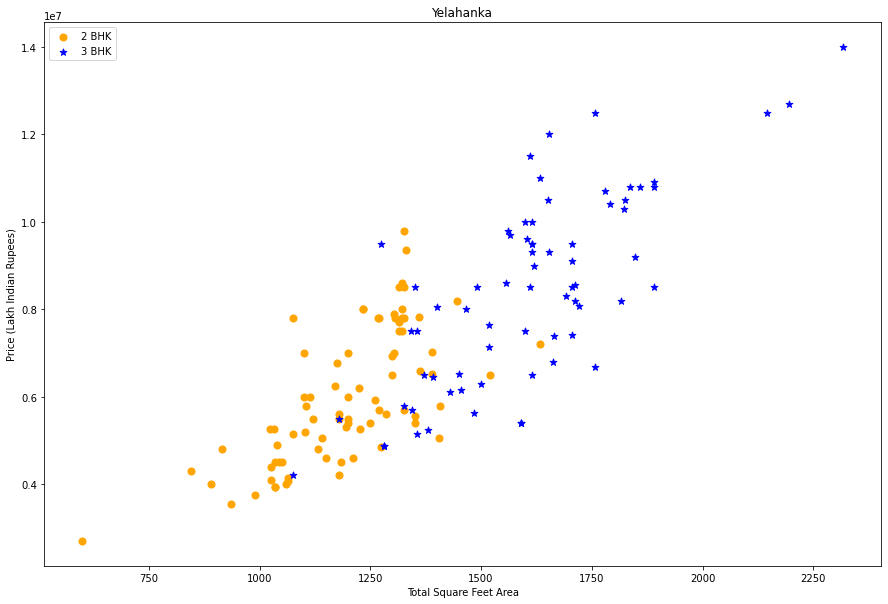

In [62]:
def plot_scatter_chart(df1,location):
    bhk2 = df1[(df1['location']==location) & (df1['size']==2)]
    bhk3 = df1[(df1['location']==location) & (df1['size']==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='orange',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='*', color='blue',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df,"Yelahanka")

From the above graph it is observed that the price of 2 BHK apartment having approximately same total sqft have higher price than that of 3 BHK 

So Removing such type of apartments from same location having size 's' whose price_per_sqft is less than mean price_per_sqft that of size 's-1'

In [63]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df = remove_bhk_outliers(df)

In [64]:
df.shape

(7616, 9)

The below graph shows the expected results at Yelahanka

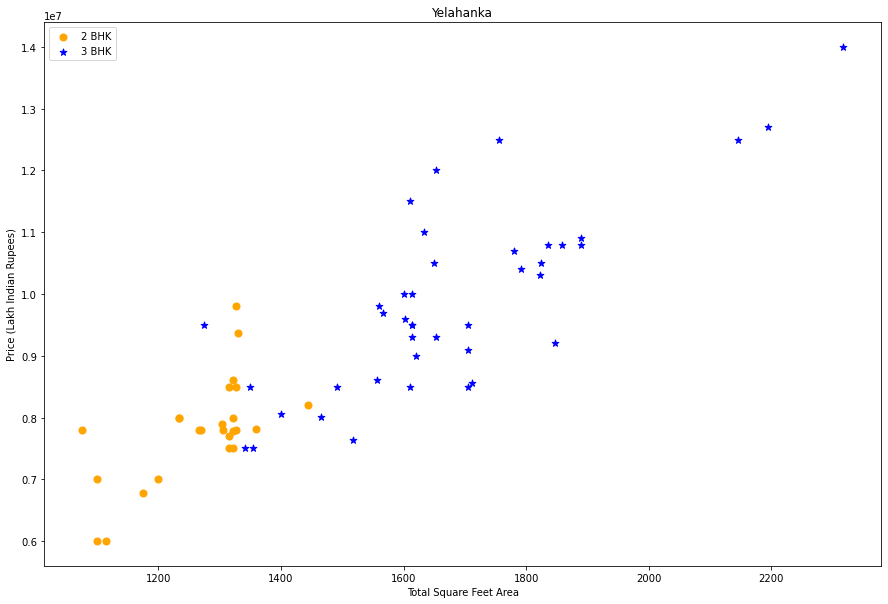

In [65]:
def plot_scatter_chart(df1,location):
    bhk2 = df1[(df1['location']==location) & (df1['size']==2)]
    bhk3 = df1[(df1['location']==location) & (df1['size']==3)]
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='orange',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='*', color='blue',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df,"Yelahanka")

# Data Visualization

In [66]:
df.describe()

,size,total_sqft,bath,balcony,price,price_per_sqft
count,7616.000000,7616.000000,7616.000000,7616.000000,7.616000e+03,7616.000000
mean,2.564076,1448.430276,2.474659,1.527048,9.636762e+06,6254.009992
std,1.049324,744.552906,1.054217,0.784822,8.576672e+06,2550.717194
min,1.000000,300.000000,1.000000,0.000000,1.000000e+06,2090.909091
25%,2.000000,1075.000000,2.000000,1.000000,5.000000e+06,4619.717919
50%,2.000000,1246.000000,2.000000,1.000000,7.400000e+06,5764.145955
75%,3.000000,1645.000000,3.000000,2.000000,1.100000e+07,7042.253521
max,16.000000,12000.000000,16.000000,3.000000,2.200000e+08,26973.684211


In [67]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

Creating a function for plotting scatter of various parameters against price

In [68]:
def scatter(parameter):
    plt.scatter(df[parameter],df['price'])
    plt.xlabel(parameter)
    plt.ylabel('price range')
    plt.title((parameter+' available in  range'))
    plt.yticks(np.arange(10000000,250000000,10000000))

Creating a function for plotting histogram of unique values of various parameters

In [69]:
def bar(parameter):
    value_count_list=dict(df[parameter].value_counts())
    plt.bar(value_count_list.keys(),value_count_list.values())
    plt.xlabel(parameter)
    plt.ylabel('Count')
    plt.title(parameter+' Vs total count')

Most of the apartments in Bengaluru are of size 2-3 bhk

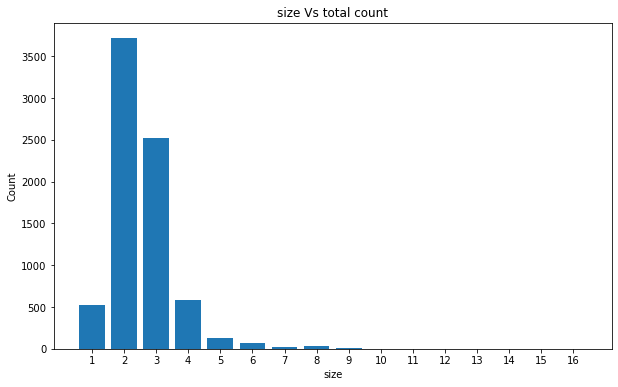

In [70]:
plt.xticks(np.arange(1,17,1))
bar('size')

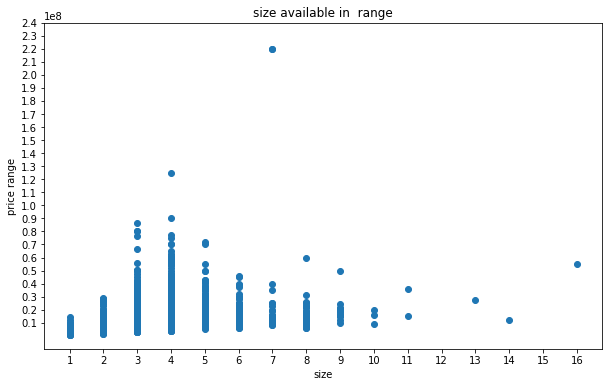

In [71]:
plt.xticks(np.arange(1, 17, 1))
scatter('size')

Most of the Apartments are in range of 5000-10000 price per sqft

Text(0.5, 1.0, 'Price per square foot vs total count in that price range')

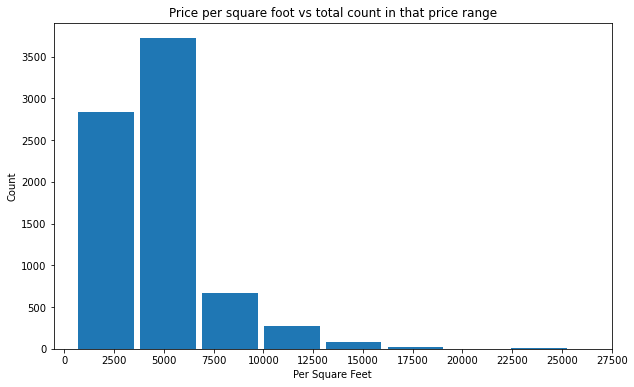

In [72]:
plt.hist(df['price_per_sqft'],rwidth=0.9,align='left',bins=8)
plt.xlabel('Per Square Feet')
plt.ylabel('Count')
plt.xticks(np.arange(0,30000,2500))
plt.title('Price per square foot vs total count in that price range')

Text(0.5, 1.0, 'size(in bhk) availability vs price per square feet')

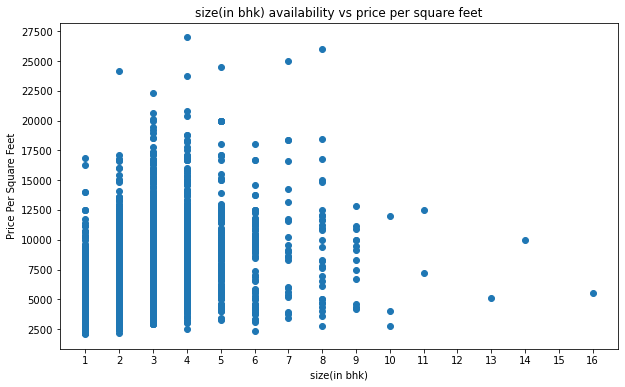

In [73]:
plt.xticks(np.arange(1,18,1))
plt.yticks(np.arange(0,40000,2500))
plt.scatter(df['size'],df['price_per_sqft'])
plt.xlabel('size(in bhk)')
plt.ylabel('Price Per Square Feet')
plt.title('size(in bhk) availability vs price per square feet')

Most of the data of area type was given in Super built-up Area

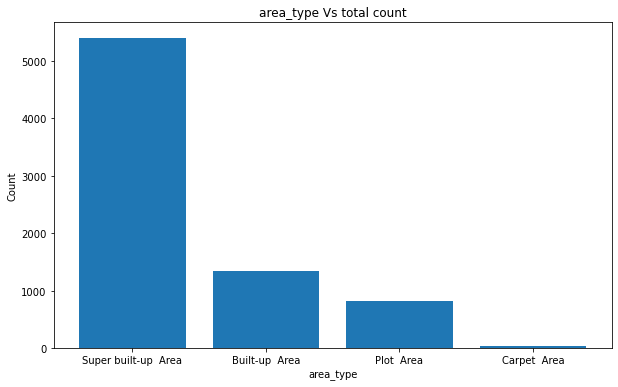

In [74]:
bar('area_type')

Most of the apartments are available for Ready to move while a thousand are ready till 2018

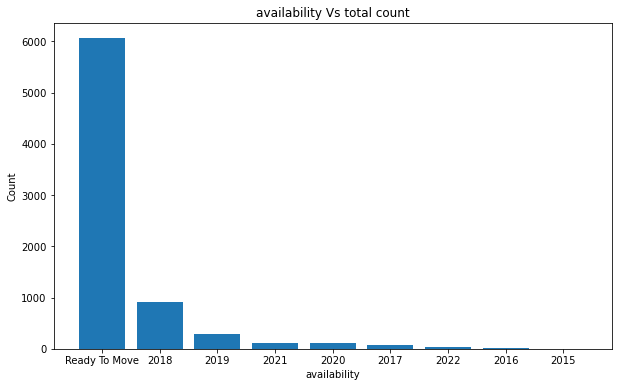

In [75]:
bar('availability')

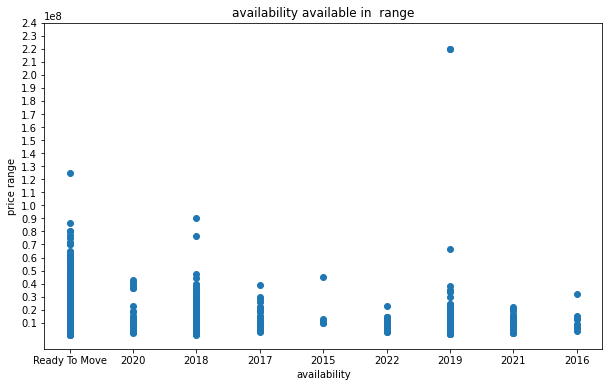

In [76]:
scatter('availability')

Most of the apartments have 1-2 balconies

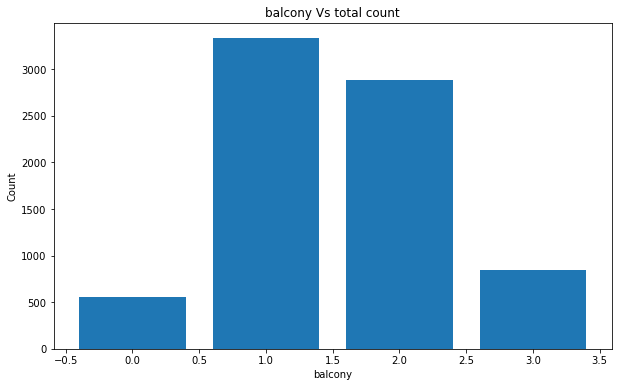

In [77]:
bar('balcony')

Most of the apartments have 2 baths

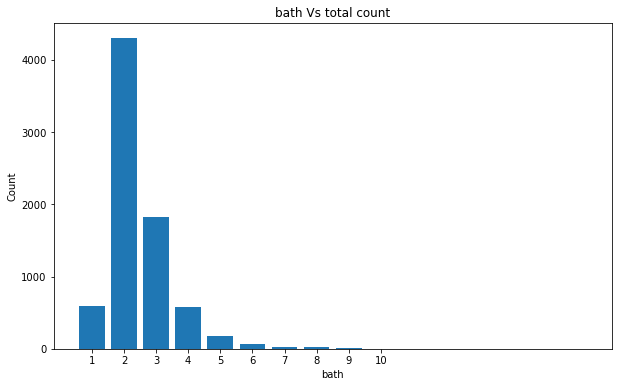

In [78]:
plt.xticks(np.arange(1,11,1))
bar('bath')

Looking for the corelation of few parameters with price

<AxesSubplot:>

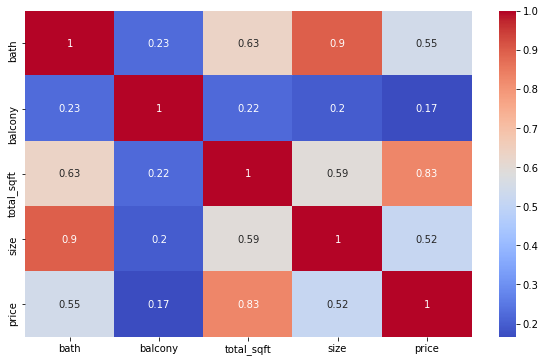

In [79]:
import seaborn as sns
num_vars = ["bath", "balcony",'total_sqft','size','price']
sns.heatmap(df[num_vars].corr(),cmap="coolwarm", annot=True)


# Preprocessing Data for building ML Model

Removing 'Balcony' column as the corelation of balcony is very less with price  
And also removing Price per sqft as it was created only data featuring  
And area type because it also don't affect the price

In [80]:
df.drop(['price_per_sqft','area_type','balcony'],axis=1,inplace=True)

In [81]:
df.head()

,availability,location,size,total_sqft,bath,price
1,Ready To Move,Devarachikkanahalli,2,1250.0,2.0,4000000.0
2,Ready To Move,Devarachikkanahalli,2,1200.0,2.0,8300000.0
3,Ready To Move,Devarachikkanahalli,2,1170.0,2.0,4000000.0
4,Ready To Move,Devarachikkanahalli,3,1425.0,2.0,6500000.0
5,Ready To Move,Devarachikkanahalli,2,947.0,2.0,4300000.0


Using OneHotEncoder for creating dummy columns of availability and location

In [82]:
availability_dummy=pd.get_dummies(df.availability)
availability_dummy.head(3)

,2015,2016,2017,2018,2019,2020,2021,2022,Ready To Move
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1


In [83]:
location_dummy=pd.get_dummies(df.location)
location_dummy.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating Final DataFrame for Model Deployment

In [84]:
df_final=pd.concat([df,availability_dummy,location_dummy.drop('Others',axis=1)],axis=1)
df_final.drop(['availability','location'],axis=1,inplace=True)
df_final.head()

,size,total_sqft,bath,price,2015,2016,2017,2018,2019,2020,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,4000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,8300000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,4000000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1425.0,2.0,6500000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,947.0,2.0,4300000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
X=df_final.drop(['price'],axis=1)
y=df_final['price']

In [86]:
X.head(3)

,size,total_sqft,bath,2015,2016,2017,2018,2019,2020,2021,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1200.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1170.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
y.head()

1    4000000.0
2    8300000.0
3    4000000.0
4    6500000.0
5    4300000.0
Name: price, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Shape of X_train : ',X_train.shape)
print('Shape of y_train : ',y_train.shape)
print('Shape of X_test : ',X_test.shape)
print('Shape of y_test : ',y_test.shape)

Shape of X_train :  (6092, 251)
Shape of y_train :  (6092,)
Shape of X_test :  (1524, 251)
Shape of y_test :  (1524,)


# Trying Different Regression Algorithms and  selecting one with highest score

In [89]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge,BayesianRidge,OrthogonalMatchingPursuit,LassoLars
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV

Finding best model using GridSearchCV

In [90]:
model_parameters={
    
    'Linear Regression':{
        'model' :             LinearRegression(),
        'params':{
            'normalize':     [True, False]
        }
    },
    
    'Decision Regression':{
        'model' :             DecisionTreeRegressor(),
        'params':{
            'criterion':     ['mse', 'friedman_mse'],
            'splitter':      ['best','random'],
            'max_features':  [None,'auto', 'sqrt', 'log2']
        }
    },
    
    'Random Forest Regression':{
        'model' :             RandomForestRegressor(),
        'params':{
            'max_features':  [None,'auto','sqrt','log2']
        }
    },
    
    'Gradient Boosting Regressor':{
        'model' :             GradientBoostingRegressor(),
        'params':{
            'loss':          ['ls', 'lad', 'huber', 'quantile'],
            'criterion':     ['friedman_mse', 'mse'],
            'max_features':  [None,'auto', 'sqrt', 'log2']
        }
    },
    
    'Lasso Regressor':{
        'model' :             Lasso(),
        'params':{
            'selection':     ['random', 'cyclic']
        }
    },
    
    'Ridge Regressor':{
        'model' :            Ridge(),
        'params':{
            'solver':        ['auto','lsqr','saga'],
            'alpha' :        [0,0.2,0.4,0.6,0.8,1]
        }
    },
    
    'Extra Tree Regressor':{
        'model' :             ExtraTreeRegressor(),
        'params':{
            'max_features':  ['sqrt','log2']
        }
    },
    
    'Bayesian Ridge Regressor':{
        'model' :             BayesianRidge(),
        'params':{}
    },
    
    'PLS Regression':{
        'model' :             PLSRegression(),
        'params':{}
    },
    
    'OrthogonalMatchingPursuit Regressor':{
        'model' :             OrthogonalMatchingPursuit(),
        'params':{}
    },
    
    'LassoLars Regressor':{
        'model' :             LassoLars(),
        'params':{}
    },
    
    'XGB Regressor':{
        'model' :              XGBRegressor(),
        'params':{
            'n_estimators':[10,50,100,500,1000]
        }
    }
}

In [91]:
def best_regression_parameters_model(X,y):
    scores=[]
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, parameters in model_parameters.items():
        gs=GridSearchCV(parameters['model'],parameters['params'],return_train_score=False,cv=cv)
        gs.fit(X,y)
        
        scores.append({
            'Model':            model_name,
            'Best Parameters':  gs.best_params_,
            'Best Score':       gs.best_score_
        })
    model= pd.DataFrame(scores,columns=['Model','Best Parameters','Best Score'])
    return model
models=best_regression_parameters_model(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8238466016098464e+16, tolerance: 41852545767221.234
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.515758005927735e+16, tolerance: 46601003314994.836
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9539303717408604e+16, tolerance: 43727945698725.836
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

In [92]:
models['Best Score']=models['Best Score']*100
models

,Model,Best Parameters,Best Score
0,Linear Regression,{'normalize': True},82.907169
1,Decision Regression,"{'criterion': 'mse', 'max_features': 'auto', '...",77.466849
2,Random Forest Regression,{'max_features': None},82.538482
3,Gradient Boosting Regressor,"{'criterion': 'friedman_mse', 'loss': 'ls', 'm...",84.480786
4,Lasso Regressor,{'selection': 'random'},82.914457
5,Ridge Regressor,"{'alpha': 0.8, 'solver': 'auto'}",83.119732
6,Extra Tree Regressor,{'max_features': 'log2'},67.556119
7,Bayesian Ridge Regressor,{},83.076646
8,PLS Regression,{},76.917772
9,OrthogonalMatchingPursuit Regressor,{},79.483603


In [93]:
models[models['Best Score']>83]

,Model,Best Parameters,Best Score
3,Gradient Boosting Regressor,"{'criterion': 'friedman_mse', 'loss': 'ls', 'm...",84.480786
5,Ridge Regressor,"{'alpha': 0.8, 'solver': 'auto'}",83.119732
7,Bayesian Ridge Regressor,{},83.076646
11,XGB Regressor,{'n_estimators': 500},88.209283


From above table it is observed that best score is achieved by using Xboost Algorithm  
So 'Xboost' is used for price prediction

In [94]:
for a in [10,50,100,500,1000]:
    xgb_reg = XGBRegressor(n_estimators=a)
    xgb_reg.fit(X_train,y_train)
    print(a," : ",xgb_reg.score(X_test,y_test)*100)

10  :  85.13863111888217
50  :  89.683546392091
100  :  90.38442512335753
500  :  91.40130204642766
1000  :  91.24323218782196


In [95]:
from sklearn.model_selection import cross_val_score
cross_val_score(XGBRegressor(n_estimators=500),X_train,y_train,cv=10)

array([0.60406077, 0.87663265, 0.47031774, 0.88383758, 0.86104617,
       0.91198953, 0.86590689, 0.82286862, 0.88566467, 0.89326225])

# Building the Model

In [96]:
model= XGBRegressor(n_estimators=500)
model.fit(X_train,y_train)
model.score(X_test,y_test)*100

91.40130204642766

In [97]:
model.predict(X_test)#predicting test data

array([19805234., 32981968., 11460259., ..., 10930063.,  5571710.,
        7626734.], dtype=float32)